# BANK CUSTOMER CHURN MODEL

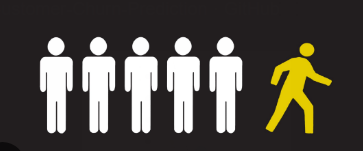

In [1]:
from IPython.display import Image, display
image_path = r'C:\Users\Mukesh Singh\Pictures\Screenshots\IMAGE2.JPG'
display(Image(filename=image_path))

# Import Library

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [14]:
import warnings as wn

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Bank%20Churn%20Modelling.csv')

# Analyse Data

In [7]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [9]:
df.duplicated('CustomerId').sum()

0

In [10]:
df =df.set_index('CustomerId')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


# Encoding

In [12]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [16]:
wn.filterwarnings("ignore", category=FutureWarning)
df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}}, inplace=True)

In [17]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [18]:
df.replace({'Gender': {'Male': 0, 'Female': 1}}, inplace=True)

In [19]:
df['Num Of Products'].value_counts()

Num Of Products
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

In [20]:
df.replace({'Num Of Products': {1:0, 2:1, 3:1, 4:1}}, inplace=True)

In [21]:
df['Has Credit Card'].value_counts()

Has Credit Card
1    7055
0    2945
Name: count, dtype: int64

In [22]:
df['Is Active Member'].value_counts()

Is Active Member
1    5151
0    4849
Name: count, dtype: int64

In [25]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

Churn
0    3117
1     500
Name: count, dtype: int64

In [26]:
df['Zero Balance'] = np.where(df['Balance']>0, 1, 0)

<Axes: >

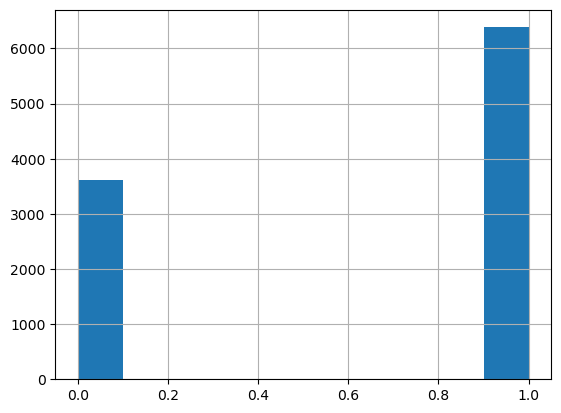

In [27]:
df['Zero Balance'].hist()

In [28]:
df.groupby(['Churn', 'Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

# Define Label and Features

In [29]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')

In [31]:
X = df.drop(['Surname','Churn'], axis = 1)

In [32]:
y = df['Churn']

In [33]:
X.shape, y.shape

((10000, 11), (10000,))

# Handing Imbalance Data

# Undersampling vs Oversampling

Undersampling
Pros:
Simple to implement.
Reduces training time by decreasing the size of the dataset.
Cons:
Loss of potentially useful data.
May lead to a less comprehensive model if the minority class is still underrepresented.

Oversampling
Pros:
Increases the representation of the minority class without losing data.
Can improve model performance on the minority class.
Cons:
Can lead to overfitting as the model may become too tailored to the synthetic samples.
Increases training time due to a larger dataset.

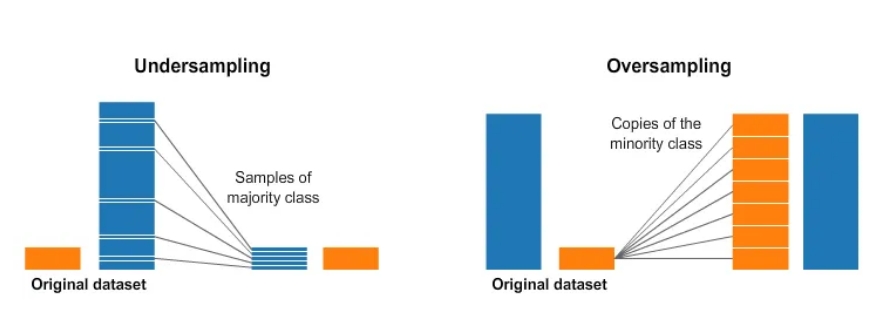

In [35]:
from IPython.display import Image, display
image_path = r'C:\Users\Mukesh Singh\Pictures\Screenshots\image4.jpg'
display(Image(filename=image_path))

In [36]:
df['Churn'].value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

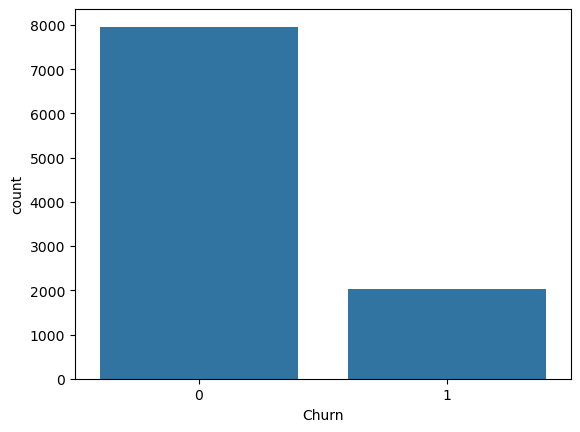

In [37]:
sns.countplot(x = 'Churn', data = df);

In [38]:
X.shape, y.shape

((10000, 11), (10000,))

# Random Under Sampling

In [40]:
from imblearn.under_sampling import RandomUnderSampler

In [41]:
rus = RandomUnderSampler(random_state=2529)

In [42]:
X_rus, y_rus = rus.fit_resample(X, y)

In [43]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [44]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

In [45]:
y_rus.value_counts()

Churn
0    2037
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

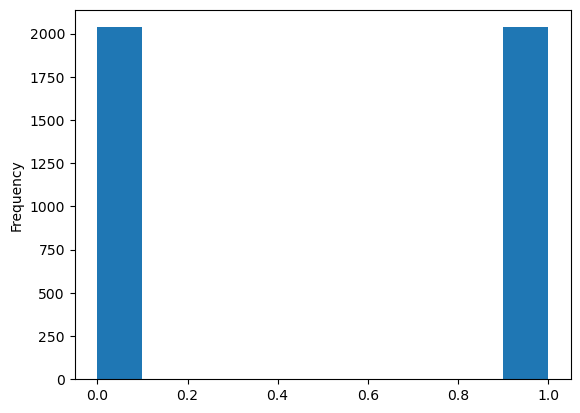

In [46]:
y_rus.plot(kind = 'hist')

# Random Over Sampling

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
ros = RandomUnderSampler(random_state=2529)

In [49]:
X_ros, y_ros = ros.fit_resample(X, y)

In [50]:
X_ros.shape, y_ros.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [51]:
y.value_counts()

Churn
0    7963
1    2037
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

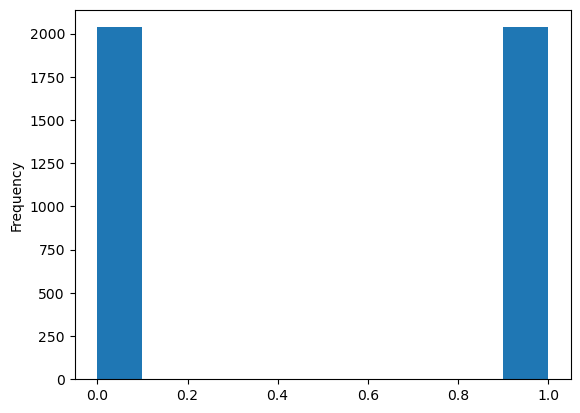

In [52]:
y_ros.plot(kind = 'hist')

# Train Test Split

In [53]:
from sklearn.model_selection import train_test_split

# Split Original Data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

# Split Random Under Sample Data

In [56]:
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus, test_size=0.3, random_state=25)

# Split Random Over Sample Data

In [57]:
X_train_ros, X_test_ros, y_train_ros, y_test_ros = train_test_split(X_ros, y_ros, test_size=0.3, random_state=25)

# Standardize Features 

In [58]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()

# Standardize Original Data

In [67]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [68]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Standardize Random under Sample Data

In [69]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [70]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Standardize Random Over Sample Data

In [71]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [72]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']] = sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

# Support Vector Machine Classifier

In [74]:
from sklearn.svm import SVC

In [75]:
svc = SVC()

In [76]:
svc.fit(X_train, y_train)

SVC()

In [77]:
y_pred = svc.predict(X_test)

# Model Accuracy

In [78]:
from sklearn.metrics import confusion_matrix, classification_report

In [79]:
confusion_matrix(y_test, y_pred)

array([[2374,   45],
       [ 421,  160]], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2419
           1       0.78      0.28      0.41       581

    accuracy                           0.84      3000
   macro avg       0.81      0.63      0.66      3000
weighted avg       0.84      0.84      0.81      3000



# Hyperparameter Tunning

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param_grid = {'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight' : ['balanced']}
                                                                    

In [83]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.7s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [84]:
print(grid.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=1)


In [85]:
grid_prediction = grid.predict(X_test)

In [86]:
confusion_matrix(y_test, grid_prediction)

array([[2166,  253],
       [ 365,  216]], dtype=int64)

In [87]:
print(classification_report(y_test, grid_prediction))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2419
           1       0.46      0.37      0.41       581

    accuracy                           0.79      3000
   macro avg       0.66      0.63      0.64      3000
weighted avg       0.78      0.79      0.79      3000



# Model With Random under Sampling

In [88]:
svc_rus = SVC()

In [89]:
svc_rus.fit(X_train_rus, y_train_rus)

SVC()

In [90]:
y_pred_rus = svc_rus.predict(X_test_rus)

# Model Accuracy

In [91]:
confusion_matrix(y_test_rus, y_pred_rus)

array([[483, 120],
       [172, 448]], dtype=int64)

In [92]:
print(classification_report(y_test_rus, y_pred_rus))

              precision    recall  f1-score   support

           0       0.74      0.80      0.77       603
           1       0.79      0.72      0.75       620

    accuracy                           0.76      1223
   macro avg       0.76      0.76      0.76      1223
weighted avg       0.76      0.76      0.76      1223



# Hyperparameter Tunning

In [93]:
param_grid = {'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight' : ['balanced']}

In [94]:
grid_rus = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [95]:
print(grid_rus.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [96]:
grid_prediction_rus = grid_rus.predict(X_test_rus)

In [97]:
confusion_matrix(y_test_rus, grid_prediction_rus)

array([[456, 147],
       [161, 459]], dtype=int64)

In [98]:
print(classification_report(y_test_rus, grid_prediction_rus))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       603
           1       0.76      0.74      0.75       620

    accuracy                           0.75      1223
   macro avg       0.75      0.75      0.75      1223
weighted avg       0.75      0.75      0.75      1223



# Model With Random over Sampling

In [100]:
svc_ros = SVC()

In [101]:
svc_ros.fit(X_train_ros, y_train_ros)

SVC()

In [102]:
y_pred_ros = svc_ros.predict(X_test_ros)

# Model Accuracy

In [103]:
confusion_matrix(y_test_ros, y_pred_ros)

array([[603,   0],
       [620,   0]], dtype=int64)

In [107]:
print(classification_report(y_test_ros, y_pred_ros))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



C:\Users\Mukesh Singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mukesh Singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mukesh Singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Hyperparameter Tunning

In [108]:
param_grid = {'C':[0.1,1,10],
            'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight' : ['balanced']}

In [109]:
grid_ros = GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv = 2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [110]:
print(grid_ros.best_estimator_)

SVC(C=10, class_weight='balanced', gamma=0.01)


In [111]:
grid_prediction_ros = grid_ros.predict(X_test_ros)

In [112]:
confusion_matrix(y_test_ros, grid_prediction_ros)

array([[603,   0],
       [620,   0]], dtype=int64)

In [113]:
print(classification_report(y_test_ros, grid_prediction_ros))

              precision    recall  f1-score   support

           0       0.49      1.00      0.66       603
           1       0.00      0.00      0.00       620

    accuracy                           0.49      1223
   macro avg       0.25      0.50      0.33      1223
weighted avg       0.24      0.49      0.33      1223



C:\Users\Mukesh Singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mukesh Singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Mukesh Singh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
